# Basics of Logistic Regression

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [5]:
raw_data = pd.read_csv('Admittance.csv')
raw_data

,SAT,Admitted
0,1714,Yes
1,1664,No
2,1760,Yes
3,1685,Yes
4,1693,Yes
...,...,...
169,1596,No
170,1942,Yes
171,1692,Yes
172,1689,No


In [6]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1714,1
1,1664,0
2,1760,1
3,1685,1
4,1693,1


## Variables

In [7]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

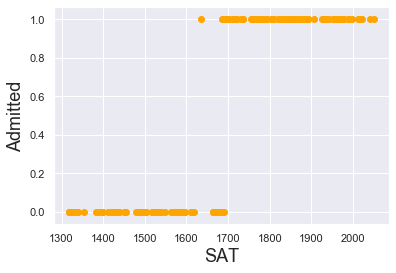

In [8]:
plt.scatter(x1, y, color = 'orange')
plt.xlabel('SAT', fontsize = 18)
plt.ylabel('Admitted', fontsize = 18)
plt.show()

### Plot with a regression line

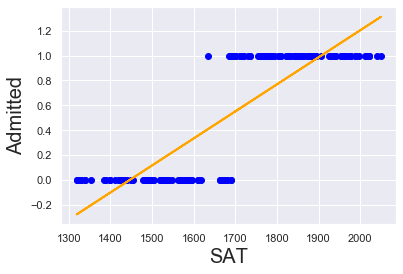

In [9]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color = 'blue')
y_hat = x1*results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw = 2, color = 'orange')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression curve

Optimization terminated successfully.
         Current function value: 0.070101
         Iterations 12


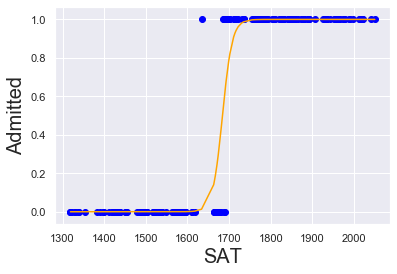

In [10]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color = 'blue')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'orange')
plt.show()

### Regression

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.070101
         Iterations 12


In [13]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  174
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.8988
Time:                        23:19:01   Log-Likelihood:                -12.198
converged:                       True   LL-Null:                       -120.56
Covariance Type:            nonrobust   LLR p-value:                 4.678e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -144.1634     53.604     -2.689      0.007    -249.226     -39.101
SAT            0.0856      0.032      2.692      0.007       0.023       0.148
==============================================================================

Possibly complete quasi-separation: A fraction 0.69 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""